<a href="https://colab.research.google.com/github/garg1709/Finance-Project/blob/main/Finance%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance Data Project

This project focuses on exploratory data analysis of stock prices.

# 1. Data

We can use various sources to obtain our data from. If we wish to obtain our data directly without importing any file, we'll have to use the Datareader to grab the stock info.
Direct link for the same- https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
In this project, we'll be taking the data of different stocks such as Bank Of America, Citi, JP Morgan etc. to analyze the stock behaviour from 2006-2016 which also included the year 2008, the year of Global Financial Crisis (GFC).

In [7]:
#Please install DataReader library if not done already using the command given below.

In [1]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#importing the requied libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import requests

In [6]:
#Defining Start and End date variables for easy use afterwards.
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [7]:
#Importing data for BankofAmerica, Citi and Goldman Sachs.
BAC = yf.download('BAC', start, end)
BAC.drop('Adj Close',axis=1, inplace=True)

C = yf.download('C', start, end)
C.drop('Adj Close',axis=1, inplace=True)

GS = yf.download('GS', start, end)
GS.drop('Adj Close',axis=1, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
#Importing data for JP Morgan, Morgan Stanley and Wells Fargo.
JPM = yf.download('JPM', start, end)
JPM.drop('Adj Close',axis=1, inplace=True)

MS = yf.download('MS', start, end)
MS.drop('Adj Close',axis=1, inplace=True)

WFC = yf.download('WFC', start, end)
WFC.drop('Adj Close',axis=1, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
#Creating a list of all the tickers.
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [11]:
#Concating all the dataframes into one.
bank_stocks= pd.concat([BAC,C,GS,JPM,MS,WFC], keys=tickers, axis=1)

In [12]:
#Setting column level names.
bank_stocks.columns.names= ['Bank Tickers', 'Stock Info']

In [13]:
bank_stocks.head()

Bank Tickers        BAC                                             \
Stock Info         Open       High        Low      Close    Volume   
Date                                                                 
2006-01-03    46.919998  47.180000  46.150002  47.080002  16296700   
2006-01-04    47.000000  47.240002  46.450001  46.580002  17757900   
2006-01-05    46.580002  46.830002  46.320000  46.639999  14970700   
2006-01-06    46.799999  46.910000  46.349998  46.570000  12599800   
2006-01-09    46.720001  46.970001  46.360001  46.599998  15619400   

Bank Tickers           C                                               ...  \
Stock Info          Open        High         Low       Close   Volume  ...   
Date                                                                   ...   
2006-01-03    490.000000  493.799988  481.100006  492.899994  1537600  ...   
2006-01-04    488.600006  491.000000  483.500000  483.799988  1870960  ...   
2006-01-05    484.399994  487.799988  484.000000  486.200012  1143160  ...   
2006-01-06    488.799988  489.000000  482.000000  486.200012  1370210  ...   
2006-01-09    486.000000  487.399994  483.000000  483.899994  1680740  ...   

Bank Tickers         MS                                                  WFC  \
Stock Info         Open       High        Low      Close   Volume       Open   
Date                                                                           
2006-01-03    57.169998  58.490002  56.740002  58.310001  5377000  31.600000   
2006-01-04    58.700001  59.279999  58.349998  58.349998  7977800  31.799999   
2006-01-05    58.549999  58.590000  58.020000  58.509998  5778000  31.500000   
2006-01-06    58.770000  58.849998  58.049999  58.570000  6889800  31.580000   
2006-01-09    58.630001  59.290001  58.619999  59.189999  4144500  31.674999   

Bank Tickers                                             
Stock Info         High        Low      Close    Volume  
Date                                                     
2006-01-03    31.975000  31.195000  31.900000  11016400  
2006-01-04    31.820000  31.365000  31.530001  10870000  
2006-01-05    31.555000  31.309999  31.495001  10158000  
2006-01-06    31.775000  31.385000  31.680000   8403800  
2006-01-09    31.825001  31.555000  31.674999   5619600  

[5 rows x 30 columns]

In [14]:
#Finding max Close price for each bank throuhgout the time period.
bank_stocks.xs(key='Close', axis=1, level= 'Stock Info').max()

Bank Tickers
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [15]:
#Creating an empty dataframe.
returns= pd.DataFrame()

We'll now be adding the returns given by each stock into the newly created dataframe.

In [16]:
for tick in tickers:
    returns[tick +' Return'] = bank_stocks[tick]['Close'].pct_change()

In [17]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [18]:
#Since there is no value before the first row, we get Nan value as there is no value to be compared to before that.

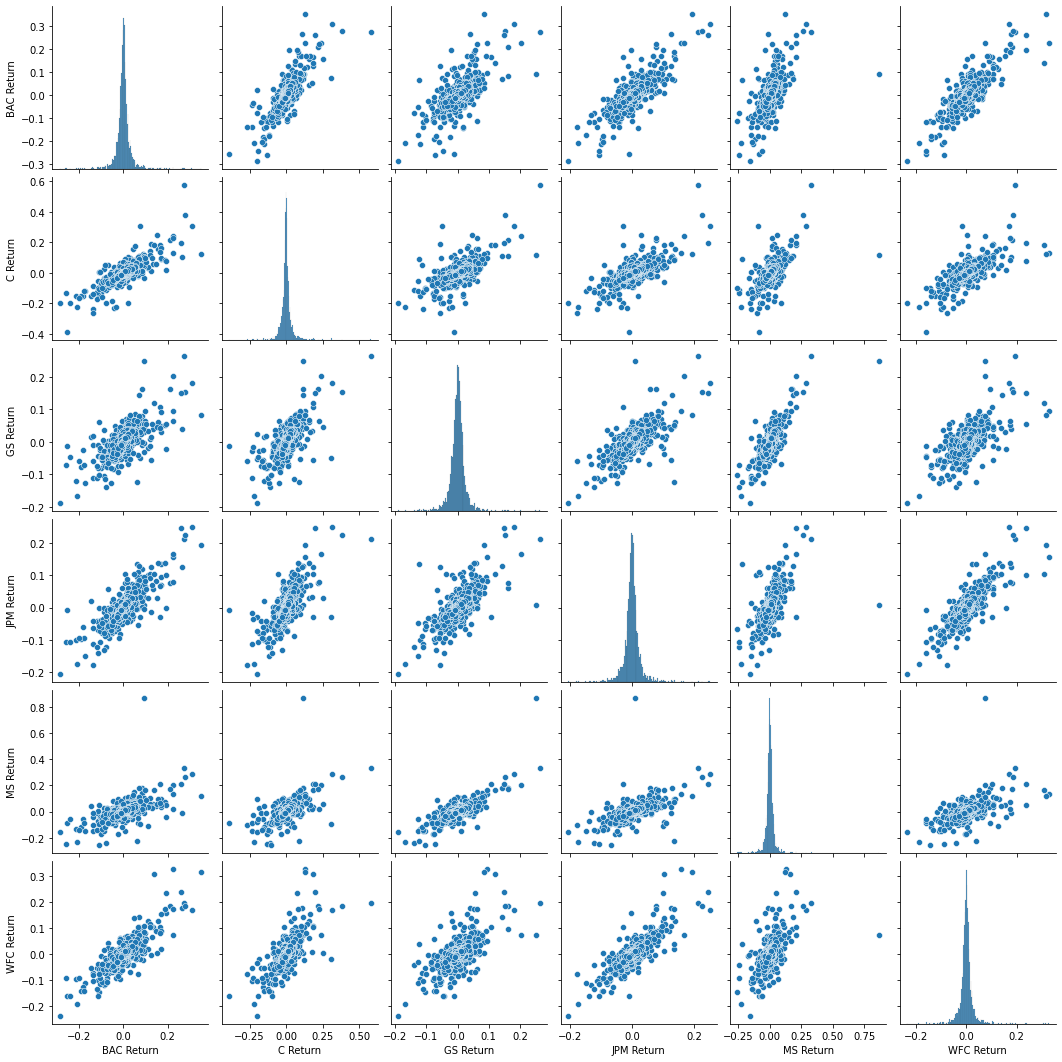

In [19]:
#Creating a paorplot for all the returns of all the banks.
import seaborn as sns
sns.pairplot(returns)

In [20]:
#To find out which dates each bank stock had the best and worst single day returns.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [21]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


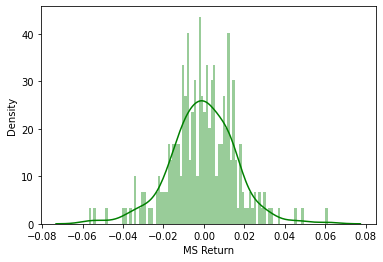

In [22]:
#Creating a distplot of the returns of Morgan Stanley for the year 2015.
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


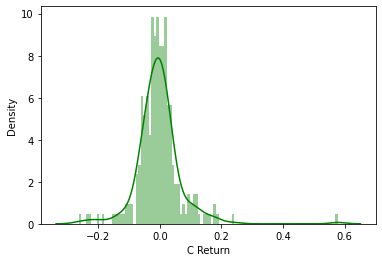

In [23]:
#Creating a distplot of the returns of Citi for the year 2008.
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='green',bins=100)

In [33]:
#Importing some more libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

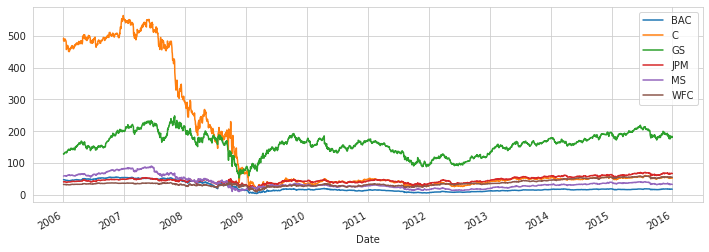

In [25]:
# To ceate a line plot showing Close price for each bank for the entire index of time.
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

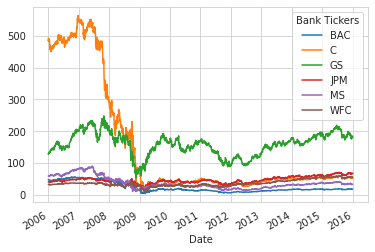

In [26]:
#We can use this method for the same task done above. 
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

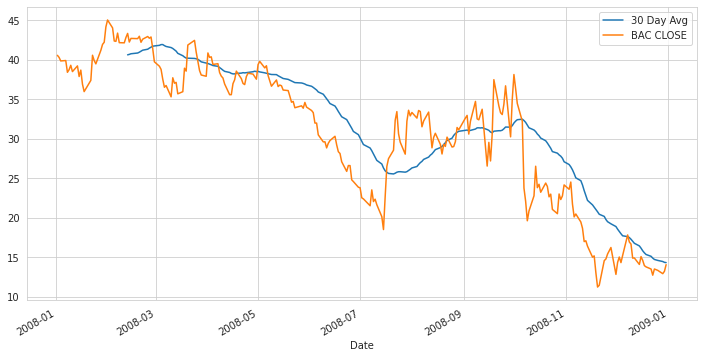

In [27]:
# To plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008.
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

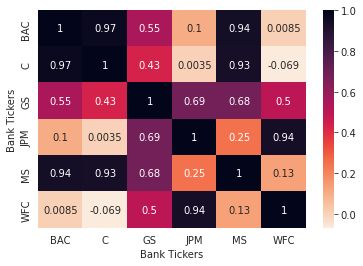

In [29]:
# To create a heatmap of the correlation between the stocks Close Price.
cmap = sns.cm.rocket_r
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level= 'Stock Info').corr(), annot=True, cmap = cmap)